**AGRICULTURE PRODUCTION OPTIMIZATION ENGINE**

Problem statement---- Build a Predictive Model so as to suggest the most suitable Crops to grow based on the available Climatic and Soil condition

**GOAL:-  Achieve Precision Farming by Optimizing the Agricultural Production**


        -> We have to optimize Productivity.
        -> By understanding requirements of climatic and soil conditions for crops.
        -> Helps us to Cope up with weather unpredictability.

In [54]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from ipywidgets import interact

In [55]:
# reading the dataset
from google.colab import files
uploaded = files.upload()
data=pd.read_csv("data agriculture.csv")

Saving data agriculture.csv to data agriculture (6).csv


In [56]:
# seeing the data at a glance
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee
2199,104.0,18.0,30.0,23.603016,60.396475,6.779833,140.937041,coffee


In [57]:
# checking dataset for null values
data.isnull().sum()

N              1
P              1
K              1
temperature    0
humidity       1
ph             1
rainfall       1
label          0
dtype: int64

In [58]:
# data cleaning
data=data.dropna()

In [59]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee


In [60]:
# occurance of each crops in the dataset
data["label"].value_counts()

apple          100
coffee         100
chickpea       100
coconut        100
lentil         100
muskmelon      100
pigeonpeas     100
maize          100
papaya         100
mango          100
grapes         100
mungbean       100
orange         100
blackgram      100
watermelon     100
jute           100
mothbeans      100
kidneybeans    100
banana         100
rice           100
cotton         100
pomegranate    100
Name: label, dtype: int64

In [61]:
# checking the average value of all the columns in the dataframe
print("Average ratio of Nitrogen in the Soil : {0:.2f}".format(data["N"].mean()))
print("Average ratio of Phosphorus in the Soil : {0:.2f}".format(data["P"].mean()))
print("Average ratio of Potassium in the Soil : {0:.2f}".format(data["K"].mean()))
print("Average temperature in Celsius : {0:.2f}".format(data["temperature"].mean()))
print("Average relative humidity in % : {0:.2f}".format(data["humidity"].mean()))
print("Average PH value of the soil : {0:.2f}".format(data["ph"].mean()))
print("Average Rainfall in mm : {0:.2f}".format(data["rainfall"].mean()))

Average ratio of Nitrogen in the Soil : 50.55
Average ratio of Phosphorus in the Soil : 53.36
Average ratio of Potassium in the Soil : 48.15
Average temperature in Celsius : 25.62
Average relative humidity in % : 71.48
Average PH value of the soil : 6.47
Average Rainfall in mm : 103.46


In [62]:
# summary statistics for each of the crop

@interact
def summary(crops=list(data["label"].value_counts().index)):
    x=data[data["label"] == crops]
    print("---------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required :",x["N"].min())
    print("Average Nitrogen required :",x["N"].mean())
    print("Maximum Nitrogen required :",x["N"].max())
    print("---------------------------------------")
    print("Statistics for Phosphorus")
    print("Minimum Phosphorus required :",x["P"].min())
    print("Average Phosphorus required :",x["P"].mean())
    print("Maximum Phosphorus required :",x["P"].max())
    print("---------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :",x["K"].min())
    print("Average Potassium required :",x["K"].mean())
    print("Maximum Potassium required :",x["K"].max())
    print("---------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required :{0:.2f}".format(x["temperature"].min()))
    print("Average Temperature required :{0:.2f}".format(x["temperature"].mean()))
    print("Maximum Temperature required :{0:.2f}".format(x["temperature"].max()))
    print("---------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required :{0:.2f}".format(x["humidity"].min()))
    print("Average Humidity required :{0:.2f}".format(x["humidity"].mean()))
    print("Maximum Humidity required :{0:.2f}".format(x["humidity"].max()))
    print("---------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required :{0:.2f}".format(x["ph"].min()))
    print("Average PH required :{0:.2f}".format(x["ph"].mean()))
    print("Maximum PH required :{0:.2f}".format(x["ph"].max()))
    print("---------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required :{0:.2f}".format(x["rainfall"].min()))
    print("Average Rainfall required :{0:.2f}".format(x["rainfall"].mean()))
    print("Maximum Rainfall required :{0:.2f}".format(x["rainfall"].max()))

interactive(children=(Dropdown(description='crops', options=('apple', 'coffee', 'chickpea', 'coconut', 'lentil…

In [63]:
# Lets compare the average requirement for each crops with average condition

@interact
def compare(conditions=["N","P","K","temperature","ph","humidity","rainfall"]):
    print("Average Value for", conditions,"is{0:.2f}".format(data[conditions].mean()))
    print("-------------------------------------------------------")
    print("Rice :{0:.2f}".format(data[(data["label"]=="rice")][conditions].mean()))
    print("Black Gram :{0:.2f}".format(data[(data["label"]=="blackgram")][conditions].mean()))
    print("Banana :{0:.2f}".format(data[(data["label"]=="banana")][conditions].mean()))
    print("Jute :{0:.2f}".format(data[(data["label"]=="jute")][conditions].mean()))
    print("Coconut :{0:.2f}".format(data[(data["label"]=="coconut")][conditions].mean()))
    print("Apple :{0:.2f}".format(data[(data["label"]=="apple")][conditions].mean()))
    print("Papaya :{0:.2f}".format(data[(data["label"]=="papaya")][conditions].mean()))
    print("Muskmelon :{0:.2f}".format(data[(data["label"]=="muskmelon")][conditions].mean()))
    print("Grapes :{0:.2f}".format(data[(data["label"]=="grapes")][conditions].mean()))
    print("Watermelon :{0:.2f}".format(data[(data["label"]=="watermelon")][conditions].mean()))
    print("Kidney Beans :{0:.2f}".format(data[(data["label"]=="kidneybeans")][conditions].mean()))
    print("Mung Beans :{0:.2f}".format(data[(data["label"]=="mungbean")][conditions].mean()))
    print("Oranges :{0:.2f}".format(data[(data["label"]=="orange")][conditions].mean()))
    print("Chick Peas :{0:.2f}".format(data[(data["label"]=="chickpea")][conditions].mean()))
    print("Lentils :{0:.2f}".format(data[(data["label"]=="lentil")][conditions].mean()))
    print("Cotton :{0:.2f}".format(data[(data["label"]=="cotton")][conditions].mean()))
    print("Maize :{0:.2f}".format(data[(data["label"]=="maize")][conditions].mean()))
    print("Moth Beans :{0:.2f}".format(data[(data["label"]=="mothbeans")][conditions].mean()))
    print("Pigeon Peas :{0:.2f}".format(data[(data["label"]=="pigeonpeas")][conditions].mean()))
    print("Mango :{0:.2f}".format(data[(data["label"]=="mango")][conditions].mean()))
    print("Pomegranate :{0:.2f}".format(data[(data["label"]=="pomegranate")][conditions].mean()))
    print("Coffee :{0:.2f}".format(data[(data["label"]=="coffee")][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [64]:
#below and above requirement

@interact
def compare(conditions=["N","P","K","temperature","ph","humidity","rainfall"]):
    print("Crops which require greater than average", conditions,"\n")
    print(data[data[conditions]>data[conditions].mean()]["label"].unique())
    print("---------------------------------------")
    print("Crops which require less than average", conditions,"\n")
    print(data[data[conditions]<=data[conditions].mean()]["label"].unique())      

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [65]:
from sklearn.cluster import KMeans  
x = data.drop(['label'],axis=1)
x = x.values
print(data.shape)

(2200, 8)


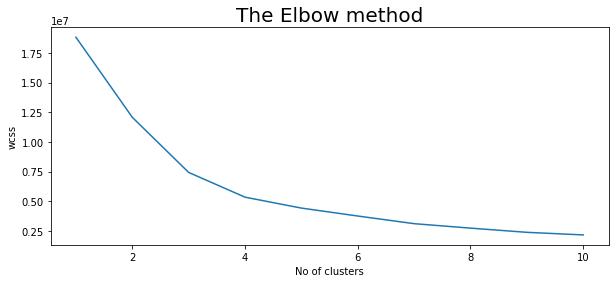

In [66]:
plt.rcParams["figure.figsize"]=(10,4)

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init="k-means++",max_iter =300,n_init=10,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("The Elbow method",fontsize=20)
plt.xlabel("No of clusters")
plt.ylabel("wcss")
plt.show()

In [67]:
# lets implement the K Means algorithm to perform clustering analysis
km = KMeans(n_clusters =4 , init = "k-means++",max_iter =300,n_init =10,random_state =0)
y_means = km.fit_predict(x)

a=data["label"]
y_means = pd.DataFrame(y_means)
z=pd.concat([y_means,a],axis=1)
z=z.rename(columns ={0:"cluster"})

print("Lets check the results after Applying the K Means Clustering Analysis \n")
print("Crops in the first cluster:",z[z["cluster"]==0]["label"].unique())
print("----------------------------------------------------------------")
print("Crops in the second cluster:",z[z["cluster"]==1]["label"].unique())
print("----------------------------------------------------------------")
print("Crops in the third cluster:",z[z["cluster"]==2]["label"].unique())
print("----------------------------------------------------------------")
print("Crops in the fourth cluster:",z[z["cluster"]==3]["label"].unique())
print("----------------------------------------------------------------")

Lets check the results after Applying the K Means Clustering Analysis 

Crops in the first cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
----------------------------------------------------------------
Crops in the second cluster: ['grapes' 'apple']
----------------------------------------------------------------
Crops in the third cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
----------------------------------------------------------------
Crops in the fourth cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
----------------------------------------------------------------


In [68]:
y=data["label"]
x=data.drop(["label"],axis=1)
print("Shape of x :",x.shape)
print("Shape of y :",y.shape)

Shape of x : (2200, 7)
Shape of y : (2200,)


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

print("The shape of x train: ", x_train.shape)
print("The shape of x test: ", x_test.shape)
print("The shape of y train: ", y_train.shape)
print("The shape of y test: ", y_test.shape)

The shape of x train:  (1760, 7)
The shape of x test:  (440, 7)
The shape of y train:  (1760,)
The shape of y test:  (440,)


In [70]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<function matplotlib.pyplot.show>

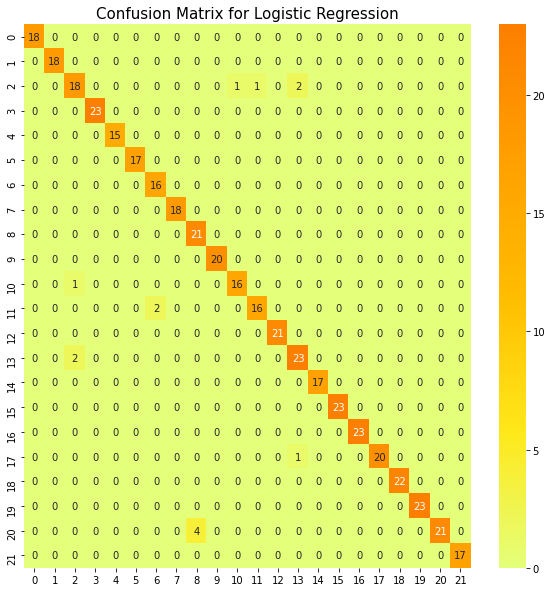

In [71]:
from sklearn.metrics import confusion_matrix
plt.rcParams["figure.figsize"]=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap="Wistia")
plt.title("Confusion Matrix for Logistic Regression",fontsize=15)
plt.show

In [72]:
data.drop(["label"], axis=1, inplace=True)
data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340


In [73]:
prediction=model.predict((np.array([[90,40,40,20,80,7,200]])))
print("The Suggested Crop for the Given Climatic COndition is:",prediction)

The Suggested Crop for the Given Climatic COndition is: ['rice']


In [74]:
prediction=model.predict((np.array([[118,20,55,30,90,7,20]])))
print("The Suggested Crop for the Given Climatic COndition is:",prediction)

The Suggested Crop for the Given Climatic COndition is: ['muskmelon']


In [75]:
prediction=model.predict((np.array([[10,30,35,40,90,7,130]])))
print("The Suggested Crop for the Given Climatic COndition is:",prediction)

The Suggested Crop for the Given Climatic COndition is: ['mango']
